In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression, ElasticNet
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report, mean_squared_error, r2_score

In [2]:
test = pd.read_csv('../data/tot_hrd_soft_labels.csv')
test_filt = test[['sample','soft prob']]
test_filt

,sample,soft prob
0,TCGA-02-0001,0.65125
1,TCGA-02-0003,0.00000
2,TCGA-02-0006,0.00000
3,TCGA-02-0007,0.68000
4,TCGA-02-0009,0.00000
...,...,...
9599,TCGA-ZS-A9CE,0.21875
9600,TCGA-ZS-A9CF-a,0.52000
9601,TCGA-ZS-A9CG,0.00000
9602,TCGA-ZU-A8S4-a,0.53125


In [3]:
annotated_df = pd.read_csv('../data/softlabels_per_Subtype.csv', sep=',', index_col=0)

In [4]:
annotated_df.reset_index(inplace=True)

In [5]:
annotated_df = annotated_df.drop(columns={'soft prob'})

In [6]:
# Perform the merge based on the common column
merged_df = pd.merge(
    annotated_df, 
    test_filt, 
    on = 'sample',
    how='inner'  # Keeps only rows present in both dataframes
)

# View the result
merged_df


,sample,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,...,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC,HRD_status_base,HRD_adjust,soft prob
0,TCGA-A1-A0SB,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,NaN,0,HR,HRP,0.00000
1,TCGA-A1-A0SD,10,10,7,27,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.51125
2,TCGA-A1-A0SE,6,6,1,13,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875
3,TCGA-A1-A0SF,7,11,8,26,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.52000
4,TCGA-A1-A0SG,3,2,4,9,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,TCGA-OL-A6VR,4,4,5,13,0,0,0.0,NaN,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875
853,TCGA-PE-A5DC,13,20,16,49,0,0,0.0,0,NaN,...,0,Bi-allelic-inactivation,0,0,YES,LumA,0,HRD,HRD ambiguous,0.95125
854,TCGA-PE-A5DD,7,6,9,22,0,0,0.0,0,NaN,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.58000
855,TCGA-PE-A5DE,6,15,11,32,0,0,0.0,0,NaN,...,0,0,0,0,0,LumA,0,HR,HRD ambiguous,0.50500


In [7]:
annotated_df = merged_df

In [8]:
annotated_df

,sample,HRD,Telomeric AI,LST,HRD-sum,BRCA1_somatic_null,BRCA1_germ_bi_allelic,BRCA1_germ_mono_allelic,BRCA1_deletion,BRCA1_epigenetic_silencing,...,event.BRCA1,event.BRCA2,event.RAD51C,event.PALB2,event.All Events,event.PAM50,event.TNBC,HRD_status_base,HRD_adjust,soft prob
0,TCGA-A1-A0SB,0,0,0,0,0,0,0.0,0,0,...,0,0,0,0,0,NaN,0,HR,HRP,0.00000
1,TCGA-A1-A0SD,10,10,7,27,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.51125
2,TCGA-A1-A0SE,6,6,1,13,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875
3,TCGA-A1-A0SF,7,11,8,26,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.52000
4,TCGA-A1-A0SG,3,2,4,9,0,0,0.0,0,0,...,0,0,0,0,0,LumA,0,HR,HRP,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,TCGA-OL-A6VR,4,4,5,13,0,0,0.0,NaN,0,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.13875
853,TCGA-PE-A5DC,13,20,16,49,0,0,0.0,0,NaN,...,0,Bi-allelic-inactivation,0,0,YES,LumA,0,HRD,HRD ambiguous,0.95125
854,TCGA-PE-A5DD,7,6,9,22,0,0,0.0,0,NaN,...,0,0,0,0,0,LumA,0,HR,HRP ambiguous,0.58000
855,TCGA-PE-A5DE,6,15,11,32,0,0,0.0,0,NaN,...,0,0,0,0,0,LumA,0,HR,HRD ambiguous,0.50500


In [9]:

rnaseq_df = pd.read_csv('../data/Deconvo2.csv', sep=',', index_col=0).reset_index(names="Case ID")
rnaseq_df['Case ID'] = rnaseq_df['Case ID'].str.split('-').str[:3].str.join('-')
rnaseq_df['Sample ID'] = rnaseq_df['Case ID'].str.split('-').str[:4].str.join('-')

brca_df_filtered = annotated_df[
    (annotated_df['event.BRCA1'] != '1') &
    (annotated_df['event.BRCA2'] != 'Bi-allelic-undetermined') &
    (annotated_df['event.PALB2'] != '2')
]

# Identify common samples across the dataframes
common_samples = set(rnaseq_df['Case ID']).intersection(set(brca_df_filtered['sample']))

# Filter RNA-seq dataframe for common samples
rnaseq_df_common = rnaseq_df[rnaseq_df['Case ID'].isin(common_samples)]

# Filter BRCA dataframe for common samples
brca_df_common = brca_df_filtered[brca_df_filtered['sample'].isin(common_samples)]

# Drop duplicates in rnaseq_df_common if any
rnaseq_df_common = rnaseq_df_common.drop_duplicates(subset=['Case ID'])

rnaseq_df_common.set_index('Case ID', inplace=True)

# Sort the samples in both dataframes by index
rnaseq_df_common = rnaseq_df_common.sort_index()
brca_df_common = brca_df_common.sort_index()


In [10]:
genes_validation = pd.read_csv('../data/validation/CCLE_RNAseq_genes_counts_20180929.gct', sep="\t", skiprows=2)
# Drop the 'Ensembl IDs' column
genes_validation_transposed = genes_validation.drop(columns=['Name'])

# Set the 'Description' column as the new header (column names)
genes_validation_transposed = genes_validation_transposed.set_index('Description').transpose()

# genes_validation_transposed_sorted = genes_validation_transposed.sort_index(axis = 1)
# Drop columns that have only zeros
genes_validation_transposed = genes_validation_transposed.loc[:, ~(genes_validation_transposed == 0).all()]

# drop duplicates
genes_validation_transposed_sorted = genes_validation_transposed.loc[:, ~genes_validation_transposed.columns.duplicated()]

In [11]:
deseq_results=pd.read_csv('../data/basic_deseq_HRD_contrast.csv', index_col=0)
deseq_filtered_rna_seq_df = rnaseq_df_common[rnaseq_df_common.columns.intersection(deseq_results.index)]

# Step 1: Find common columns
common_columns = set(deseq_filtered_rna_seq_df.columns).intersection(genes_validation_transposed.columns)

# Step 2: Filter each dataframe to keep only common columns
deseq_filtered_rna_seq_df_common = deseq_filtered_rna_seq_df[list(common_columns)]
genes_validation_common = genes_validation_transposed_sorted[list(common_columns)]

# Display the resulting shapes to confirm
print("Shape of filtered deseq_filtered_rna_seq_df:", deseq_filtered_rna_seq_df_common.shape)
print("Shape of filtered genes_validation:", genes_validation_common.shape)

breast_filt = genes_validation_common[genes_validation_common.index.str.contains('BREAST')]

Shape of filtered deseq_filtered_rna_seq_df: (857, 6347)
Shape of filtered genes_validation: (1019, 6347)


In [98]:
breast_filt

Description,ARL1,HEXIM1,ABHD17B,LCOR,AP1S3,EXOSC2,ZNF512B,ACBD4,ACAP2,EME2,...,ULK4,ZNF646,SMYD5,TRIB2,PI4K2B,HSPA2,CCDC12,LARP4B,ARHGAP32,HSPA8
AU565,3.772566,3.805776,3.495794,3.537767,3.487192,3.700127,3.738496,3.257924,3.761257,3.627802,...,2.980906,3.636805,3.645724,3.491054,3.565164,3.356255,3.601833,3.831178,3.867508,4.237902
BT20,3.745798,3.874016,3.496460,3.552762,3.364942,3.791559,3.809238,3.334112,3.809542,3.545632,...,3.130638,3.629678,3.661211,3.596583,3.632804,3.471718,3.626549,3.800706,3.741588,4.157696
BT474,3.660955,3.728017,3.499895,3.577369,3.440890,3.746591,3.844886,3.109861,3.680569,3.547364,...,2.982011,3.573315,3.605730,3.156377,3.645297,2.958803,3.524539,3.827388,3.774289,4.161788
BT483,3.789659,3.817809,3.288090,3.629298,3.288578,3.652684,3.885437,3.379077,3.710406,3.741237,...,3.275453,3.689122,3.587191,3.596661,3.565979,3.091456,3.610717,3.868592,3.758717,4.139297
BT549,3.747197,3.718677,3.580800,3.616099,3.131186,3.811589,3.765316,3.122235,3.717987,3.362688,...,3.168110,3.609927,3.585554,3.614850,3.682196,3.629488,3.625481,3.856708,3.630873,4.227375
CAL120,4.034135,3.834477,3.516647,3.547257,3.523730,3.640113,3.693616,3.449635,3.696256,3.341922,...,3.244854,3.583388,3.651814,3.319060,3.568070,3.393931,3.557225,3.853478,3.654140,4.169782
CAL148,3.711006,3.667519,3.585849,3.565020,3.440787,3.773860,3.906011,3.299693,3.691926,3.630465,...,3.285878,3.834544,3.756814,3.467722,3.706168,3.440890,3.751993,3.850212,3.822275,4.172680
CAL51,3.727452,3.714946,3.565452,3.644412,3.462181,3.705377,3.733175,3.351489,3.763339,3.479595,...,3.195724,3.570273,3.571617,3.773988,3.643838,3.343552,3.562595,3.769570,3.574497,4.127340
CAL851,3.754257,3.741090,3.423984,3.532949,3.449733,3.657324,3.520514,3.268799,3.737851,3.399798,...,3.007002,3.452355,3.586060,3.484195,3.637676,3.646799,3.552032,3.769319,3.643176,4.171931
CAMA1,3.808214,3.902171,3.679579,3.595953,3.472574,3.758834,3.873401,3.502478,3.793412,3.814846,...,3.455222,3.728178,3.657088,3.269070,3.773744,3.357260,3.556617,3.838411,3.742696,4.172714


In [13]:
deseq_filtered_rna_seq_df_common

,ARL1,HEXIM1,ABHD17B,LCOR,AP1S3,EXOSC2,ZNF512B,ACBD4,ACAP2,EME2,...,ULK4,ZNF646,SMYD5,TRIB2,PI4K2B,HSPA2,CCDC12,LARP4B,ARHGAP32,HSPA8
Case ID,,,,,,,,,,,,,,,,,,,,,
TCGA-A1-A0SB,2587.400,1104.812,456.868,2236.628,137.692,667.160,1815.576,237.160,1116.772,220.724,...,106.192,1192.000,981.664,874.956,785.544,312.284,689.200,1851.024,2478.924,27029.052
TCGA-A1-A0SD,6168.132,3469.572,700.236,3934.436,301.684,961.284,2016.700,528.900,3125.680,442.872,...,479.508,1253.408,1328.476,1043.448,1641.924,7679.812,1036.848,4763.948,5253.924,40102.564
TCGA-A1-A0SE,6748.240,3042.608,646.032,2676.000,285.316,961.956,1644.944,507.676,1884.632,438.288,...,342.832,1764.380,1623.532,1132.916,958.792,1346.764,1091.280,5239.832,3860.188,46771.264
TCGA-A1-A0SF,3505.432,2416.200,429.200,2918.968,108.068,708.700,1684.420,505.540,1205.748,550.032,...,232.620,1457.852,1167.020,493.608,782.728,7186.064,1030.728,3313.220,4374.540,23908.884
TCGA-A1-A0SG,5923.708,4389.372,527.836,2300.272,368.196,638.636,1942.408,923.824,1824.828,1042.168,...,355.884,2676.324,1173.576,1383.456,1160.176,1142.832,1604.044,3635.536,4675.468,43342.920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-OL-A6VR,6667.316,6024.560,699.744,3480.368,258.680,1521.780,3079.264,1890.928,1855.708,1008.440,...,689.812,2439.164,2335.284,556.456,1191.276,52966.608,2931.324,5008.676,4944.136,55757.120
TCGA-PE-A5DC,7126.336,3844.420,262.188,2085.140,532.456,1056.816,1688.508,1539.344,1095.884,2436.060,...,344.576,1355.560,1436.228,676.656,922.960,375.192,980.004,3212.556,3119.356,20583.648
TCGA-PE-A5DD,3892.424,2047.224,214.508,1366.824,135.984,1011.872,1606.724,352.416,845.016,1053.440,...,475.700,1335.536,930.136,1251.564,483.204,2071.264,1654.744,2564.340,4063.448,14443.640


In [24]:
ispy2_expr = pd.read_csv('../data/validation/GSE173839_ISPY2_AgilentGeneExp_durvaPlusCtr_FFPE_meanCol_geneLevel_n105.txt', sep = '\t')
ispy2_expr.set_index('GeneName', inplace=True)
ispy_probe_transposed = ispy2_expr.T
ispy_probe_transposed.sort_index(inplace=True)
ispy_probe_transposed.dropna(inplace=True)

common_columns_ispy = ispy_probe_transposed.columns.intersection(deseq_filtered_rna_seq_df_common.columns)

# Convert to a list
deseq_filtered_rna_seq_df_common = deseq_filtered_rna_seq_df_common[list(common_columns_ispy)]


Training Elastic Net with Grid Search to predict HRD probabilities:


/Users/johnsmith/miniconda3/envs/HRDclass/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.123e-01, tolerance: 8.831e-03
  model = cd_fast.enet_coordinate_descent(
/Users/johnsmith/miniconda3/envs/HRDclass/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.231e-02, tolerance: 8.831e-03
  model = cd_fast.enet_coordinate_descent(


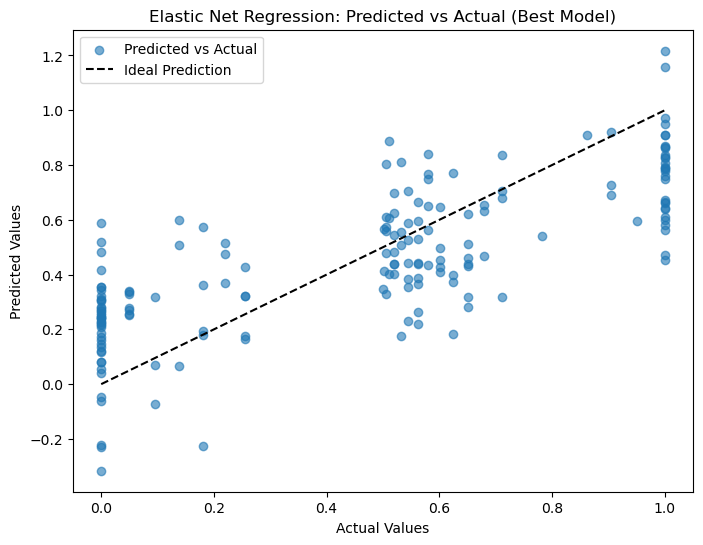

Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.1}
Mean Squared Error: 0.055
R^2 Score: 0.577


({'Mean Squared Error': 0.05548195602483146, 'R^2 Score': 0.5770567060560311},
 {'alpha': 0.1, 'l1_ratio': 0.1})

In [26]:
from sklearn.model_selection import ParameterGrid
def preprocess_data(X, y, task='regression'):
    """
    Preprocesses data by splitting into train-test sets and scaling features.
    For regression, no label encoding is applied.
    """
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    return X_train_scaled, X_test_scaled, y_train, y_test
# Elastic Net Training & Evaluation with Grid Search
def train_evaluate_elastic_net_with_grid_search(X_train, X_test, y_train, y_test, alphas, l1_ratios):
    """
    Trains and evaluates Elastic Net models for a grid of hyperparameters.
    Returns the best model and its metrics.
    """
    best_model = None
    best_metrics = {'Mean Squared Error': float('inf'), 'R^2 Score': -float('inf')}
    best_params = {}

    # Grid search
    param_grid = ParameterGrid({'alpha': alphas, 'l1_ratio': l1_ratios})
    for params in param_grid:
        model = ElasticNet(alpha=params['alpha'], l1_ratio=params['l1_ratio'], max_iter=1000, random_state=42)
        
        # Train model
        model.fit(X_train, y_train)
        
        # Predict on test set
        y_pred = model.predict(X_test)
        
        # Evaluate model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Update best model if current is better
        if mse < best_metrics['Mean Squared Error']:
            best_model = model
            best_metrics = {'Mean Squared Error': mse, 'R^2 Score': r2}
            best_params = params

    # Scatter plot of predictions vs actual values for the best model
    y_pred_best = best_model.predict(X_test)
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred_best, alpha=0.6, label='Predicted vs Actual')
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', label='Ideal Prediction')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title('Elastic Net Regression: Predicted vs Actual (Best Model)')
    plt.legend(loc="upper left")
    plt.show()
    
    print(f"Best Parameters: {best_params}")
    print(f"Mean Squared Error: {best_metrics['Mean Squared Error']:.3f}")
    print(f"R^2 Score: {best_metrics['R^2 Score']:.3f}")
    
    return best_model, best_metrics, best_params

# Main Execution with Hyperparameter Grid Search
def main():
    """
    Main function for preprocessing data, training Elastic Net with grid search, and displaying results.
    """
    print("\nTraining Elastic Net with Grid Search to predict HRD probabilities:")
    
    # Example data preprocessing
    X_train, X_test, y_train, y_test = preprocess_data(deseq_filtered_rna_seq_df_common, brca_df_common['soft prob'], task='regression')
    
    # Define hyperparameter ranges
    alphas = [0.01, 0.1, 0.25, 0.5, 1.0]
    l1_ratios = [0.1, 0.5, 0.7, 0.9]
    
    best_model, best_metrics, best_params = train_evaluate_elastic_net_with_grid_search(
        X_train, X_test, y_train, y_test, alphas, l1_ratios
    )
    
    return best_model, best_metrics, best_params

# Execute Main
elastic_net_model, elastic_net_metrics, elastic_net_params = main()
elastic_net_metrics, elastic_net_params


## ISPY stuff


In [27]:
common_columns_ispy = ispy_probe_transposed.columns.intersection(deseq_filtered_rna_seq_df_common.columns)

# Convert to a list
ispy_probe_transposed_filt = ispy_probe_transposed[list(common_columns_ispy)]

In [35]:
ispy2_response = pd.read_csv('../data/validation/GSE173839_ISPY2_DurvalumabOlaparibArm_biomarkers.csv')
ispy2_response.loc[ispy2_response["pCR.status"] == -1, "pCR.status"] = (
    0  # present in control arm
)

ispy2_response.sort_values(by='ResearchID', inplace=True)
ispy2_response["ResearchID"] = ispy2_response["ResearchID"].astype(str).str.strip()
ispy2_expr = ispy2_expr[ispy2_response["ResearchID"]]

In [54]:
ispy2_response.set_index('ResearchID', inplace=True)

In [36]:
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(ispy_probe_transposed_filt)

In [37]:
ispy_predictions = elastic_net_model.predict(scaled_data)

In [41]:
ispy2_response.index

Index([ 47,   2,  10,  79,  33,  90,  94,  64,  93,  40,
       ...
        35,  72,  62,  59,  89,  77,   3, 104, 101,  28],
      dtype='int64', length=105)

In [63]:
# Find the common indices
common_indices = ispy_probe_transposed_filt.index.intersection(ispy2_response.index)

# Filter both DataFrames for the common indices, maintaining the order
filtered_ispy_probe = ispy_probe_transposed_filt.loc[common_indices]
filtered_ispy_response = ispy2_response.loc[common_indices]

filtered_ispy_response['predictions'] = ispy_predictions

In [64]:
filtered_ispy_response

,Arm,HR.status..0.HR....1..HR..,HER2.status..0..HER2...1..HER2..,MP.1.2..class..0..MP1..1..MP2.,pCR.status,PD1,PDL1,T.cells_sig,B.cells_sig,Dendritic.cells_sig,Mast.cells_sig,CD68,TIS_sig,STAT1_sig,TAMsurr_TcClassII_ratio_sig,PARPi7_sig.,Mitotic_sig,ESR1_PGR_ave,SET.index,predictions
102596,durvalumab/olaparib,1,0,1,1,-0.2654,-0.5872,-1.14600,-0.2133,-0.54830,-0.87380,0.4597,-0.77500,0.32190,0.6371,-0.04779,-0.6912,0.2124,0.0000,0.404172
111922,control,0,0,0,1,-0.2291,0.1822,0.56610,0.6596,0.09725,1.48800,0.1437,0.08854,-1.08500,-1.3380,0.05193,-1.6850,-0.5785,0.0000,0.429232
115724,durvalumab/olaparib,0,0,1,1,-0.5318,-1.0650,-1.16400,-0.9401,-0.70660,-0.63510,0.5603,-0.45880,-0.02152,1.7470,0.63250,-0.5281,-0.9590,0.0000,0.917270
123591,durvalumab/olaparib,0,0,1,1,0.2354,-0.1478,0.53980,1.2240,0.08093,-1.64500,1.0920,0.61320,0.29390,0.3913,0.66030,0.8545,-0.8885,0.0000,0.758374
134956,control,1,0,1,0,1.2960,-1.0260,0.79980,0.4545,-0.36070,0.27960,0.4310,0.21500,0.65450,-0.4670,1.30400,0.7663,0.9600,0.6826,0.402431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
944184,durvalumab/olaparib,1,0,1,0,0.7932,0.9536,0.91430,0.7279,-0.51960,-1.04100,0.9625,0.81300,0.94120,0.2360,-0.30660,0.3240,0.3629,0.9791,0.728643
965961,control,1,0,1,0,0.5028,0.3036,0.85170,0.5254,1.10600,0.10030,0.3735,0.53910,0.44300,0.2601,1.24100,-0.0885,-0.8809,0.0000,0.642588
979809,durvalumab/olaparib,0,0,1,0,-0.3643,0.2692,-0.06857,0.2789,0.52250,0.03754,-1.4370,-0.21720,-0.52470,0.5547,0.16920,0.4013,-0.4975,0.0000,0.564543
989123,durvalumab/olaparib,0,0,1,1,1.2110,1.6550,1.26500,0.1080,1.51600,-1.07500,0.5747,1.97200,2.39800,0.7749,0.08533,1.0980,-0.7261,0.0000,0.686668


In [58]:
import plotly_express as px

In [96]:
px.box(filtered_ispy_response, y ='predictions', x = 'pCR.status', points = "all", title = f"Distribution of regression scores between patients' complete pathological response")

In [67]:
# two sided welch's t test taking pCR into accont
from scipy.stats import ttest_ind, mannwhitneyu
stats = {}

group_0 = filtered_ispy_response.loc[filtered_ispy_response['pCR.status'] == 0, 'predictions']
group_1 = filtered_ispy_response.loc[filtered_ispy_response['pCR.status'] == 1, 'predictions']


t_stat, p_value_t = ttest_ind(group_0, group_1, equal_var=False)
print(f"Welch's t-test: t = {t_stat:.4f}, p = {p_value_t:.4f}")

u_stat, p_value_u = mannwhitneyu(group_0, group_1, alternative='two-sided')
print(f"Mann-Whitney U test: U = {u_stat:.4f}, p = {p_value_u:.4f}")

Welch's t-test: t = -3.1041, p = 0.0029
Mann-Whitney U test: U = 451.0000, p = 0.0053


In [122]:
from scipy.stats import pearsonr
import numpy as np
import plotly.express as px

# Data for plotting
x = filtered_ispy_response['PARPi7_sig.']
y = filtered_ispy_response['predictions']

# Calculate Pearson R and p-value
r_value, p_value = pearsonr(x, y)

# Create the scatter plot with an adjusted color palette
fig = px.scatter(
    filtered_ispy_response,
    x='PARPi7_sig.',
    y='predictions',
    title=f"Regression scores between patients against PARPi7 sig scores",
    labels={'PARPi7_sig.': 'PARPi7 Signal', 'predictions': 'Predictions'},
    color='pCR.status',
    trendline="ols",  # Add regression line
    color_continuous_scale='magenta'  # Use a more subtle color palette
)

# Add R value and p-value as annotation
fig.add_annotation(
    x=np.mean(x), 
    y=np.max(y),
    text=f"Pearson R: {r_value:.2f}<br>p-value: {p_value:.2e}",
    showarrow=False,
    font=dict(size=14, color="black"),
    align="center",
    bordercolor="black",
    borderwidth=1,
    borderpad=4,
    bgcolor="white",
    opacity=1.0
)

# Show the plot
fig.show()


# CCLE STUFF

In [104]:
#breast_filt

In [112]:

# Align breast_filt with deseq_filtered_rna_seq_df_common columns
breast_filt_aligned = breast_filt.reindex(columns=deseq_filtered_rna_seq_df_common.columns, fill_value=0)
# Check for column alignment
print("Are columns aligned?", list(breast_filt_aligned.columns) == list(deseq_filtered_rna_seq_df_common.columns))

feature_columns = breast_filt_aligned.columns  # Adjust if necessary
X = breast_filt_aligned[feature_columns]
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

# Generate predictions
predictions = elastic_net_model.predict(scaled_X)

# Add the predictions to the DataFrame
breast_filt_aligned['Predictions'] = predictions
#predictions
#breast_filt_aligned

Are columns aligned? True


In [124]:
#breast_filt_aligned.index

In [128]:
prism = pd.read_excel('../data/validation/PRISM_CCLE.xlsx', skiprows=1)
prism['CellLine'] = prism['CellLine'].str.replace('-', '', regex=True)
prism.set_index('CellLine', inplace=True)

In [133]:
merged_prism = pd.merge(prism, breast_filt_aligned, how='inner', left_index=True, right_index=True)

In [137]:
merged_prism

,ModelID,HRD_score,OLAPARIB,TALAZOPARIB,NIRAPARIB,RUCAPARIB,A1BG,A2M,AAAS,AAGAB,...,ZSWIM7,ZSWIM8,ZW10,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,Predictions
MCF7,ACH-000019,0.308480,-0.797929,-0.023578,0.148739,0.306764,3.187631,2.698630,3.716527,3.849534,...,3.439752,3.735960,3.475703,3.671388,3.850737,3.557276,3.442839,3.492951,3.617201,0.457145
ZR751,ACH-000097,0.241552,-0.187433,-0.887602,-0.294294,-0.256895,3.275976,2.280357,3.372611,3.707532,...,3.301973,3.653333,3.422955,3.566314,3.804002,3.448751,3.329102,3.483637,3.370143,0.213753
EFM192A,ACH-000117,0.254499,0.400780,0.511160,0.407931,0.362635,3.478198,2.968376,3.707811,3.780132,...,3.565548,3.788548,3.564393,3.635473,3.886981,3.639077,3.376848,3.620829,3.751203,0.426255
T47D,ACH-000147,0.121484,-0.169727,-1.319614,-0.084790,0.482255,3.267439,1.887697,3.730033,3.751912,...,3.375196,3.830691,3.684745,3.618567,3.916336,3.548223,3.480167,3.584071,3.472488,0.369693
CAL120,ACH-000212,0.576000,-0.170584,0.568778,0.076630,-0.676282,3.458969,2.595598,3.593007,3.676408,...,3.308213,3.712163,3.636985,3.596700,3.798670,3.443653,3.528163,3.641170,3.774612,0.417675
HCC1937,ACH-000223,0.554144,0.877093,0.806382,0.688014,-0.107405,3.237007,2.156860,3.630528,3.694637,...,3.395820,3.600461,3.708460,3.622958,3.732677,3.597990,3.443348,3.619787,3.758016,0.608261
HCC38,ACH-000276,0.837489,0.241112,-0.645883,-1.021853,NaN,3.327532,2.473680,3.603419,3.756051,...,3.400714,3.721826,3.617817,3.696155,3.932894,3.575220,3.410599,3.620426,3.801020,0.758356
HCC1419,ACH-000277,-0.033598,1.188068,0.305949,0.656047,0.351747,3.309741,1.790535,3.602136,3.759079,...,3.766972,3.734720,3.563666,3.567645,3.865565,3.569573,3.540038,3.594686,3.751462,0.498612
BT549,ACH-000288,0.723114,0.348175,-2.081534,-0.054022,-0.466699,3.390231,2.086759,3.667077,3.725563,...,3.515469,3.783418,3.724063,3.738046,3.902951,3.521783,3.520705,3.660596,3.915532,0.621615
EFM19,ACH-000330,0.324444,-0.306832,-1.940784,-0.498919,0.360583,3.161624,1.584963,3.600728,3.827231,...,3.209869,3.830835,3.598805,3.664749,3.932331,3.632371,3.507248,3.617954,3.521720,0.339010


In [139]:
from scipy.stats import pearsonr
import numpy as np
import plotly.express as px

# List of columns to plot
columns_to_plot = ['OLAPARIB', 'TALAZOPARIB', 'NIRAPARIB', 'RUCAPARIB']
merged_prism.dropna(inplace=True)
# Loop through each column and create a scatter plot
for column in columns_to_plot:
    # Data for plotting
    x = merged_prism[column]
    y = merged_prism['Predictions']

    # Calculate Pearson R and p-value
    r_value, p_value = pearsonr(x, y)

    # Create the scatter plot
    fig = px.scatter(
        merged_prism,
        x=column,
        y='Predictions',
        title=f"Scatter Plot: {column} vs Predictions",
        trendline="ols",  # Add regression line
        labels={column: column, 'Predictions': 'Predictions'},
        color_continuous_scale='magenta'  # Use a more subtle color palette
    )

    # Add R value and p-value as annotation
    fig.add_annotation(
        x=np.mean(x), 
        y=np.max(y),
        text=f"Pearson R: {r_value:.2f}<br>p-value: {p_value:.2e}",
        showarrow=False,
        font=dict(size=14, color="black"),
        align="center",
        bordercolor="black",
        borderwidth=1,
        borderpad=4,
        bgcolor="white",
        opacity=1.0
    )

    # Show the plot
    fig.show()


In [ ]:
px.scatter(merged_prism, x = 'OLAPARIB', y = 'Predictions')

In [21]:
import pandas as pd
import numpy as np

# Load the data
drug_resp = pd.read_csv('../data/validation/BRCA_IC_Sat Jan 11 20_40_55 2025.csv')

# Define PARP inhibitors
parps = ['Olaparib', 'Talazoparib', 'Niraparib', 'Rucaparib', 'Veliparib']

# Filter and select specific drugs
parpi_resp = drug_resp[drug_resp['Drug Name'].isin(parps)]
parpi_resp_filt = parpi_resp[['Drug Name', 'Cell Line Name', 'IC50']].copy()

# Apply transformations explicitly
parpi_resp_filt['IC50'] = parpi_resp_filt['IC50'].clip(lower=1e-6)
parpi_resp_filt['log10IC50'] = np.log10(parpi_resp_filt['IC50'])

parpi_resp_filt["Cell Line Name"] = parpi_resp_filt["Cell Line Name"].str.replace("-", "", regex=True)

merged_df = breast_filt_aligned.merge(
    parpi_resp_filt,
    right_on ='Cell Line Name',
    left_index=True
)
subset_df = merged_df[['Cell Line Name', 'Drug Name', 'Predictions', 'log10IC50']]
subset_df

,Cell Line Name,Drug Name,Predictions,log10IC50
31,AU565,Olaparib,0.378746,0.649300
81,AU565,Veliparib,0.378746,0.728449
275,AU565,Rucaparib,0.378746,0.618083
323,AU565,Niraparib,0.378746,0.658753
370,AU565,Talazoparib,0.378746,0.446904
...,...,...,...,...
30,ZR7530,Olaparib,0.184975,0.774099
80,ZR7530,Veliparib,0.184975,0.791624
274,ZR7530,Rucaparib,0.184975,0.785756
322,ZR7530,Niraparib,0.184975,0.690543


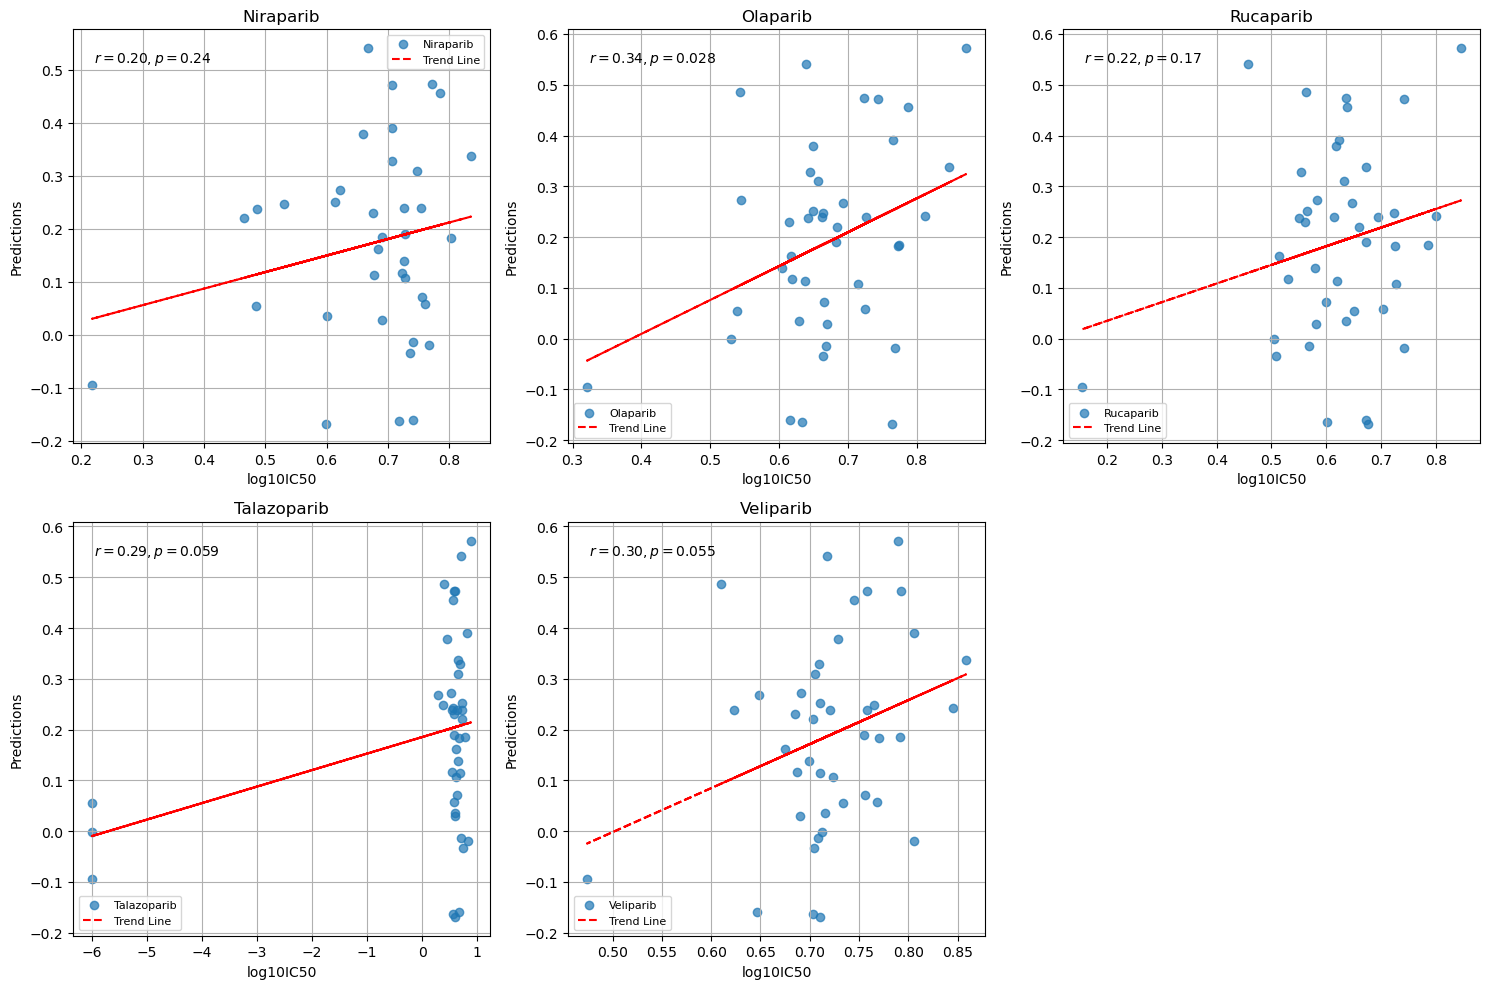

In [22]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import numpy as np

# Group the DataFrame by 'Drug Name'
grouped = merged_df.groupby('Drug Name')

# Determine the number of groups and set up the grid size
num_drugs = len(grouped)
cols = 3  # Number of columns in the grid
rows = -(-num_drugs // cols)  # Calculate rows (ceiling division)

# Create a figure with subplots
fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the grid of axes for easier indexing

# Loop through each group and create a plot
for i, (drug_name, group) in enumerate(grouped):
    ax = axes[i]
    
    # Scatter plot
    x = group['log10IC50']
    y = group['Predictions']
    ax.scatter(x, y, label=drug_name, alpha=0.7)
    
    # Calculate and plot the trend line
    z = np.polyfit(x, y, 1)  # Linear fit (degree 1)
    p = np.poly1d(z)
    ax.plot(x, p(x), color='red', linestyle='--', label='Trend Line')
    
    # Calculate Pearson's r and p-value
    r_value, p_value = pearsonr(x, y)
    
    # Add text with Pearson's r and p-value
    ax.text(
        0.05, 0.95,
        f"$r = {r_value:.2f}, p = {p_value:.2g}$",
        transform=ax.transAxes,
        fontsize=10,
        verticalalignment='top'
    )
    
    # Add plot details
    ax.set_title(f'{drug_name}')
    ax.set_xlabel('log10IC50')
    ax.set_ylabel('Predictions')
    ax.grid(True)
    ax.legend(fontsize=8)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the entire figure
plt.show()
